Question 2: Attempt to reproduce Example 4.5 from the Lindholm et al. textbook. You
will need to:
• Convert the data into a binary classification problem.
• Train a logistic regression model on the training data.
• Evaluate the trained model to calculate a confusion matrix.
• Vary the decision threshold for the model as done in Example 4.5 and
recalculate the confusion matrix.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Tutoring Courses/DCOMP4702
%ls
%cd PracW6/
%ls

In [ ]:
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
data_train=pd.read_csv("ann-train.data",delimiter=" ",header=None)
data_test=pd.read_csv("ann-test.data",delimiter=" ",header=None)
# Merge classes 1 and 2 into a single class in train set
data_train.iloc[:, -1].replace({1: 1, 2: 1}, inplace=True)

# Merge classes 1 and 2 into a single class in test set
data_test.iloc[:, -1].replace({1: 1, 2: 1}, inplace=True)

# Convert class 3 to class 2 in train set
data_train.iloc[:, -1].replace({3: 0}, inplace=True)

# Convert class 3 to class 2 in test set
data_test.iloc[:, -1].replace({3: 0}, inplace=True)
# print(data_train.dtypes)

# data.dropna(inplace=True)
# nan_counts = data_train.isna().sum()
# # Count the number of columns with at least one NaN value
# num_nan_cols = (nan_counts > 0).sum()
# print(num_nan_cols)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_train=imp_mean.fit_transform(data_train)
data_test=imp_mean.fit_transform(data_test)


# Extract the input and output/target variables
X_train = np.array(data_train[:, :-1])
y_train = np.array(data_train[:, -1])

y_train = [0 if y!=3 else 1 for y in y_train]

X_test = np.array(data_test[:, :-1])
y_true =np.array(data_test[:, -1])
y_true = np.array([0 if x!=3 else 1 for x in y_true])
y_train = [1 if y!=3 else 0 for y in y_train]
y_true = [1 if y!=3 else 0 for y in y_true]
# X_train=np.concatenate((X_train,X_test))
# y_train=np.concatenate((y_train,y_true))
# X_train, X_test, y_train, y_true=train_test_split(X_train,y_train,test_size=3428,random_state=42,shuffle=True)
print(len([x for x in y_train if x==1])/len(X_train))
print(len([x for x in y_true if x==1])/len(y_true))
print(set(y_train))


0.9247083775185578
0.927071178529755
{0, 1}


https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

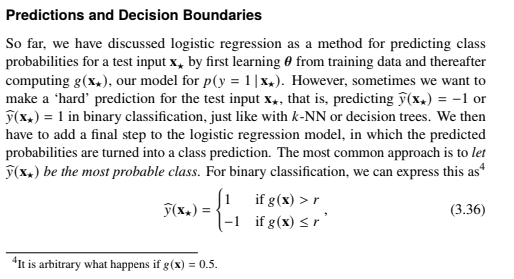

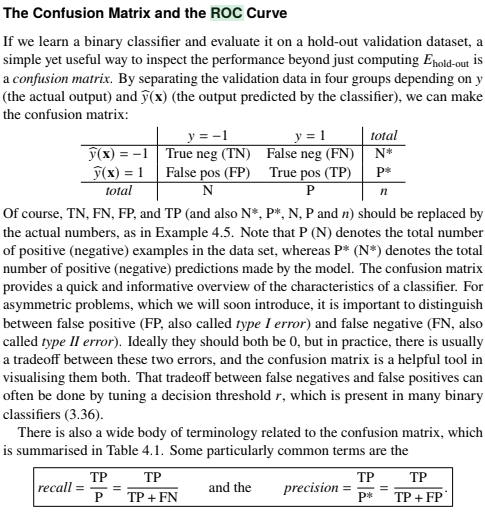

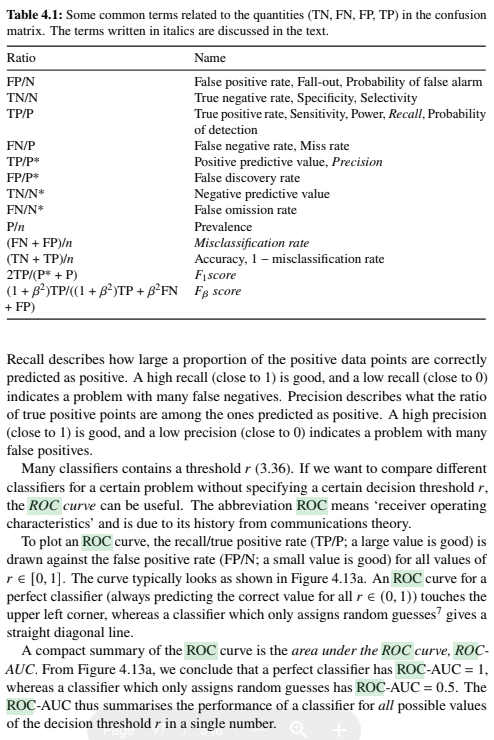

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def predict_r(y_true,y_pred,y_proba,r):
  class_names = ['Abnormal', 'Normal']
  cm=confusion_matrix(y_true, y_pred)
  cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
  print('Confusion Matrix with r=',r)
  print(cm_df)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['Abnormal', 'Normal'])
  cmd.plot()
  # Calculate TP, FP, FN, TN
  TP = ((y_true == 1) & (y_pred == 1)).sum()#'normal'&'normal'
  FP = ((y_true == 0) & (y_pred == 1)).sum()#'abnormal'&'normal'
  FN = ((y_true == 1) & (y_pred ==0 )).sum()#'normal'&'abnormal'
  TN = ((y_true ==0) & (y_pred ==0 )).sum()#'abnormal'&'abnormal'

  # Print confusion matrix with TP, FP, FN, TN indications
  print('Confusion Matrix:')
  print(f'True Positives: {TP}, False Positives: {FP}')
  print(f'False Negatives: {FN}, True Negatives: {TN}')
  # Calculate ROC curve and AUC
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred,pos_label=1)
  print("thresholds",thresholds)
  auc = roc_auc_score(y_true, y_proba)
  disp = RocCurveDisplay.from_predictions(y_true,y_pred,pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)
  # display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='logistic regression')
  
  # Plot ROC curve
  # plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % auc)
  plt.plot([0, 1], [0, 1], 'r--', label='Random classifier')
  # display.plot()
  plt.show()
  # plt.xlabel('False Positive Rate')
  # plt.ylabel('True Positive Rate')
  # plt.title('Receiver Operating Characteristic')
  # plt.legend(loc='lower right')
  # plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
print(set(y))
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])
roc_auc_score(y, clf.decision_function(X))

{0, 1}


0.994767718408118

{0, 1.0}
Coefficients: [[-0.49846045 -0.35471903 -0.28632796 -0.60750495 -0.56504953 -1.18598993
  -0.57889702  0.11078898  0.212015    0.64219023 -0.5070301  -0.33068795
  -0.52230441 -0.02534552 -0.02209431 -1.28099665  6.08042953 -0.86531894
  -5.68133131  0.13439876 -5.89799002]]
Intercept: [-2.09760443]
Confusion Matrix with r= 0.1
          Abnormal  Normal
Abnormal      3352       3
Normal          39      34
Confusion Matrix:
True Positives: 34, False Positives: 3
False Negatives: 39, True Negatives: 3352
thresholds [2 1 0]


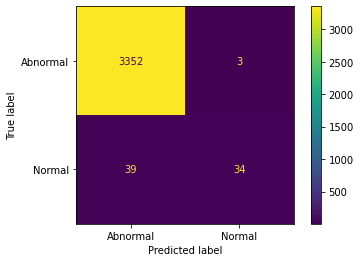

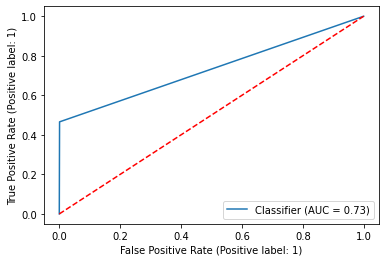

Confusion Matrix with r= 0.35
          Abnormal  Normal
Abnormal      3355       0
Normal          68       5
Confusion Matrix:
True Positives: 5, False Positives: 0
False Negatives: 68, True Negatives: 3355
thresholds [2 1 0]


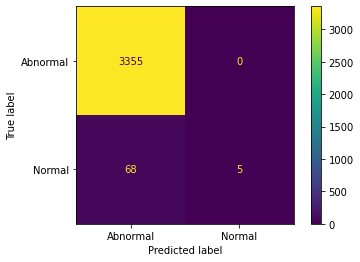

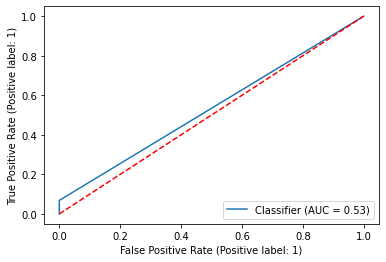

Confusion Matrix with r= 0.4
          Abnormal  Normal
Abnormal      3355       0
Normal          68       5
Confusion Matrix:
True Positives: 5, False Positives: 0
False Negatives: 68, True Negatives: 3355
thresholds [2 1 0]


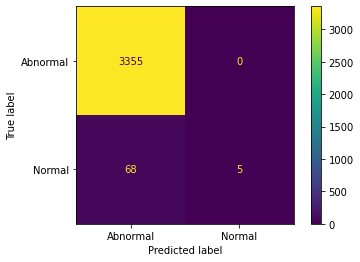

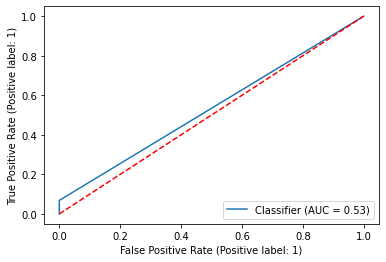

Confusion Matrix with r= 0.5
          Abnormal  Normal
Abnormal      3355       0
Normal          69       4
Confusion Matrix:
True Positives: 4, False Positives: 0
False Negatives: 69, True Negatives: 3355
thresholds [2 1 0]


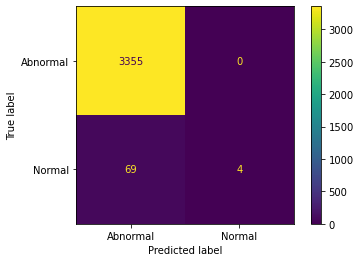

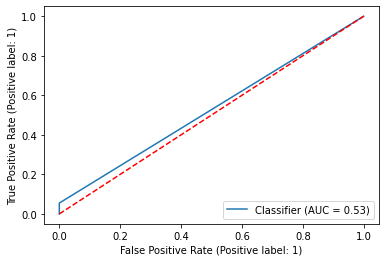

Confusion Matrix with r= 0.8
          Abnormal  Normal
Abnormal      3355       0
Normal          73       0
Confusion Matrix:
True Positives: 0, False Positives: 0
False Negatives: 73, True Negatives: 3355
thresholds [1 0]


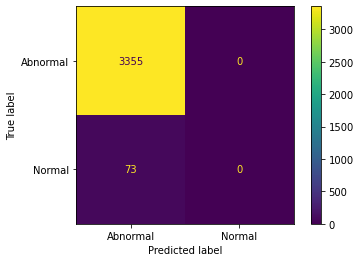

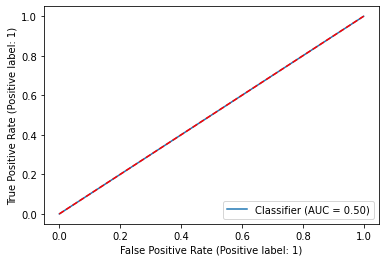

In [ ]:

from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Define true labels and predicted probabilities
print(set(y_train))
# Fit a linear regression model to the data
reg = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)


# Print the coefficients of the model
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# print(len(list(train_data[0:5])[0]))
Y_prob = clf.predict_proba(X_test)
# print(Y_prob[:20])
# Y_prob_pos = Y_prob[:, 1]
Y_prob_pos=reg.predict_proba(X_test)[:, 1]
r_list=[0.1,0.35,0.4,0.5,0.8]
for r in r_list:
  y_pred=[1 if x>r else 0 for x in Y_prob_pos]
  Y_prob_pos = Y_prob[:, 1]
  # print("our pred",y_pred[:20])
  # print("machine pred",reg.predict(X_test)[:20])
  predict_r(np.array(y_true),np.array(y_pred),Y_prob_pos,r)

# Print confusion matrix



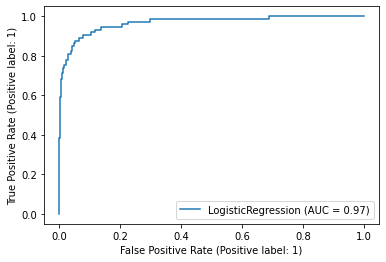

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(reg, X_test, y_true,pos_label=1)
plt.show()


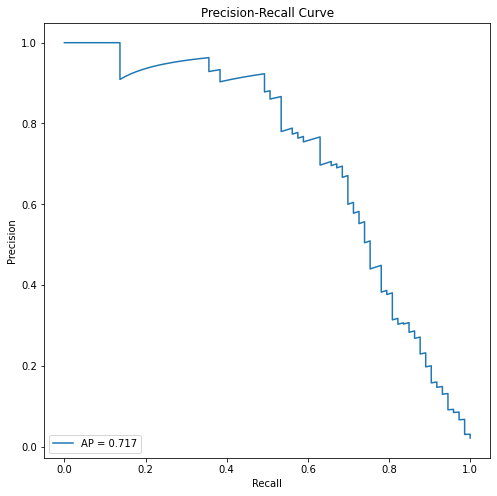

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Predict class probabilities on validation set
Y_prob = reg.predict_proba(X_test)
Y_prob_pos = Y_prob[:, 1]

# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, Y_prob_pos, pos_label=1)
average_precision = average_precision_score(y_true, Y_prob_pos, pos_label=1)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'AP = {average_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Question 3: In Prac W4 we applied linear regression to a pokemon dataset, where the loss function was sum of squares (or mean squared) error. Revisit this task but add (a) L2; (b) L 1 regularisation to the loss function, with some suitable value for the regularization hyperparameter (see Section 5.3 of the textbook). Compare the coefficient values from your different trained models.

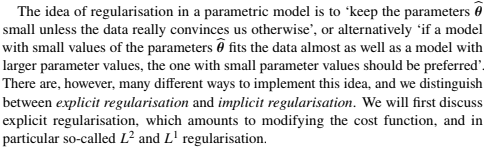

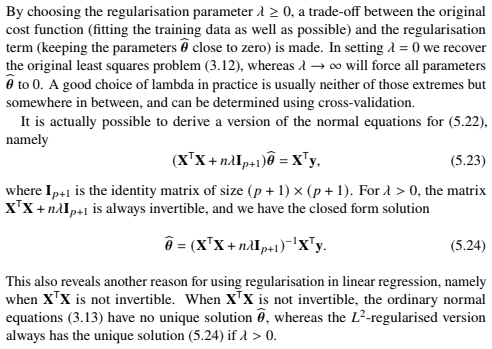

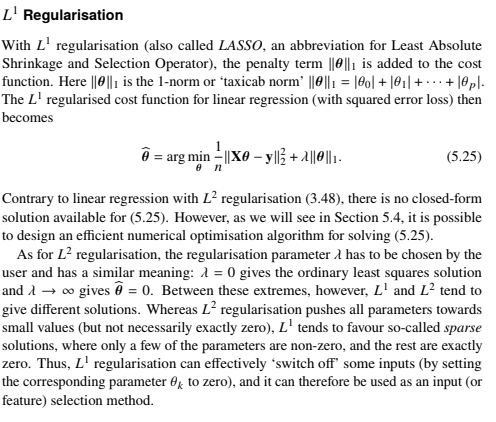

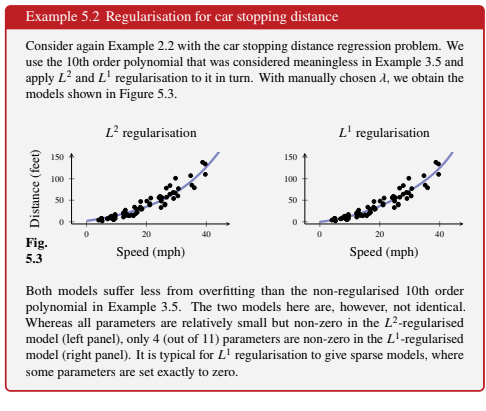

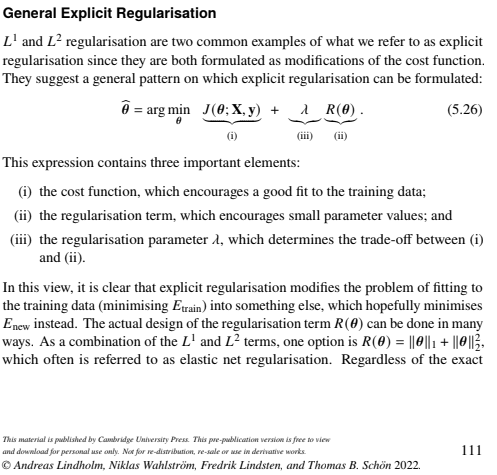

Both StandardScaler and MinMaxScaler are transformers in scikit-learn that are used to preprocess data before feeding it to a machine learning model. The main difference between the two is the type of normalization they perform:

    StandardScaler standardizes the data by subtracting the mean and dividing by the standard deviation, so that each feature has zero mean and unit variance. This results in a distribution that is centered around zero with a standard deviation of 1.

    MinMaxScaler scales the data so that all values fall between a specified minimum and maximum value (by default, between 0 and 1). This is done by subtracting the minimum value and dividing by the range of values.

In general, StandardScaler is more appropriate when the distribution of the features is Gaussian (i.e., bell-shaped) or when the features are not bounded by a specific range. MinMaxScaler, on the other hand, is more appropriate when the distribution of the features is not Gaussian and when the features have a known range (e.g., pixel intensities in image processing).

It's important to note that the choice of normalization method can affect the performance of the model, and it's often a good idea to try different normalization methods and compare their performance.

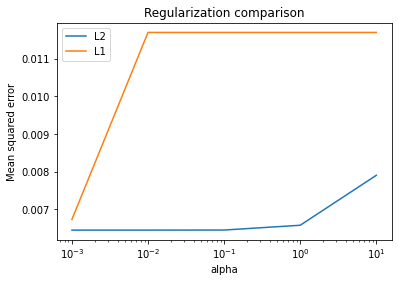

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import  Ridge, Lasso
from sklearn.metrics import mean_squared_error
# Read CSV file using Pandas
file_name = 'pokemonregr.csv'
df = pd.read_csv(file_name)
# print(df.head)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df=imp_mean.fit_transform(df)
df=imp_mean.fit_transform(df)
X = df[:, :-1]
Y = df[:,-1]

# Normalize data using StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.reshape(-1,1))
# Set up list of regularization parameter values
alpha_values = [0.001, 0.01, 0.1, 1, 10]

# Compute mean squared error for different values of alpha
mse_l2 = []
mse_l1 = []
for alpha in alpha_values:
    reg_l2 = Ridge(alpha=alpha)
    reg_l1 = Lasso(alpha=alpha)
    reg_l2.fit(X, Y)
    reg_l1.fit(X, Y)
    Y_pred_l2 = reg_l2.predict(X)
    Y_pred_l1 = reg_l1.predict(X)
    mse_l2.append(mean_squared_error(Y, Y_pred_l2))
    mse_l1.append(mean_squared_error(Y, Y_pred_l1))

# Plot results
plt.plot(alpha_values, mse_l2, label='L2')
plt.plot(alpha_values, mse_l1, label='L1')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.title('Regularization comparison')
plt.legend()
plt.show()

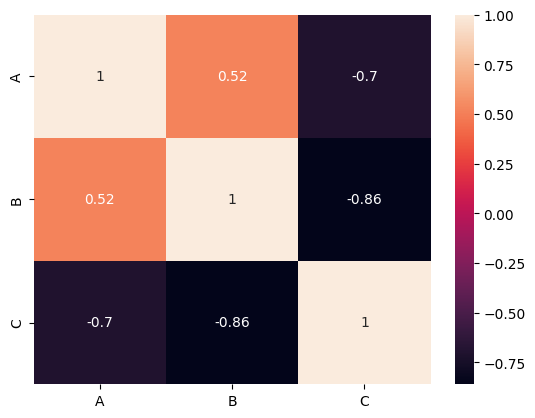

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'A': [45, 37, 42, 35, 39],
        'B': [38, 31, 26, 28, 33],
        'C': [10, 15, 17, 21, 12]
        }

df = pd.DataFrame(data)

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()